In [2]:
import numpy as np
import pandas as pd
! pip install sidetable
import sidetable
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# load data
df = pd.read_csv('../data/data.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


## Explanation of Variables

1. **BAD**: Target variable indicating whether the individual defaulted on a loan (1 for default, 0 for non-default).

2. **LOAN**: The total amount of the loan taken by the individual.

3. **MORTDUE**: The amount overdue on the mortgage, reflecting the current outstanding balance or overdue payments.

4. **VALUE**: The appraised value of the property or asset against which the loan is secured.

5. **REASON**: A categorical variable indicating the reason for taking the loan (e.g., home purchase, debt consolidation).

6. **JOB**: A categorical variable representing the job status or occupation of the individual.

7. **YOJ (Years on Job)**: The number of years the individual has been employed in their current job, indicating job stability.


...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [5]:
# check target balance (BAD)
df.stb.freq(['FraudResult'], style = True)

,FraudResult,count,percent,cumulative_count,cumulative_percent
0,0,"95,469",99.80%,"95,469",99.80%
1,1,193,0.20%,"95,662",100.00%


In [7]:
# REASON - check categories
df.stb.freq(['ProductCategory'], style = True)

,ProductCategory,count,percent,cumulative_count,cumulative_percent
0,financial_services,"45,405",47.46%,"45,405",47.46%
1,airtime,"45,027",47.07%,"90,432",94.53%
2,utility_bill,"1,920",2.01%,"92,352",96.54%
3,data_bundles,"1,613",1.69%,"93,965",98.23%
4,tv,"1,279",1.34%,"95,244",99.56%
5,ticket,216,0.23%,"95,460",99.79%
6,movies,175,0.18%,"95,635",99.97%
7,transport,25,0.03%,"95,660",100.00%
8,other,2,0.00%,"95,662",100.00%


Categories:

*   DebtCon: Refers to loans taken for debt consolidation.
*   HomeImp: Refers to loans taken for home improvement.




In [ ]:
# JOB - check categories
df.stb.freq(['JOB'], style = True)

,JOB,count,percent,cumulative_count,cumulative_percent
0,Other,"2,388",42.03%,"2,388",42.03%
1,ProfExe,"1,276",22.46%,"3,664",64.50%
2,Office,948,16.69%,"4,612",81.18%
3,Mgr,767,13.50%,"5,379",94.68%
4,Self,193,3.40%,"5,572",98.08%
5,Sales,109,1.92%,"5,681",100.00%


In [8]:
# Check numeric variables
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [9]:
# missing check
df.stb.missing()

,missing,total,percent
TransactionId,0,95662,0.0
BatchId,0,95662,0.0
AccountId,0,95662,0.0
SubscriptionId,0,95662,0.0
CustomerId,0,95662,0.0
CurrencyCode,0,95662,0.0
CountryCode,0,95662,0.0
ProviderId,0,95662,0.0
ProductId,0,95662,0.0
ProductCategory,0,95662,0.0


### Unvariate analysis


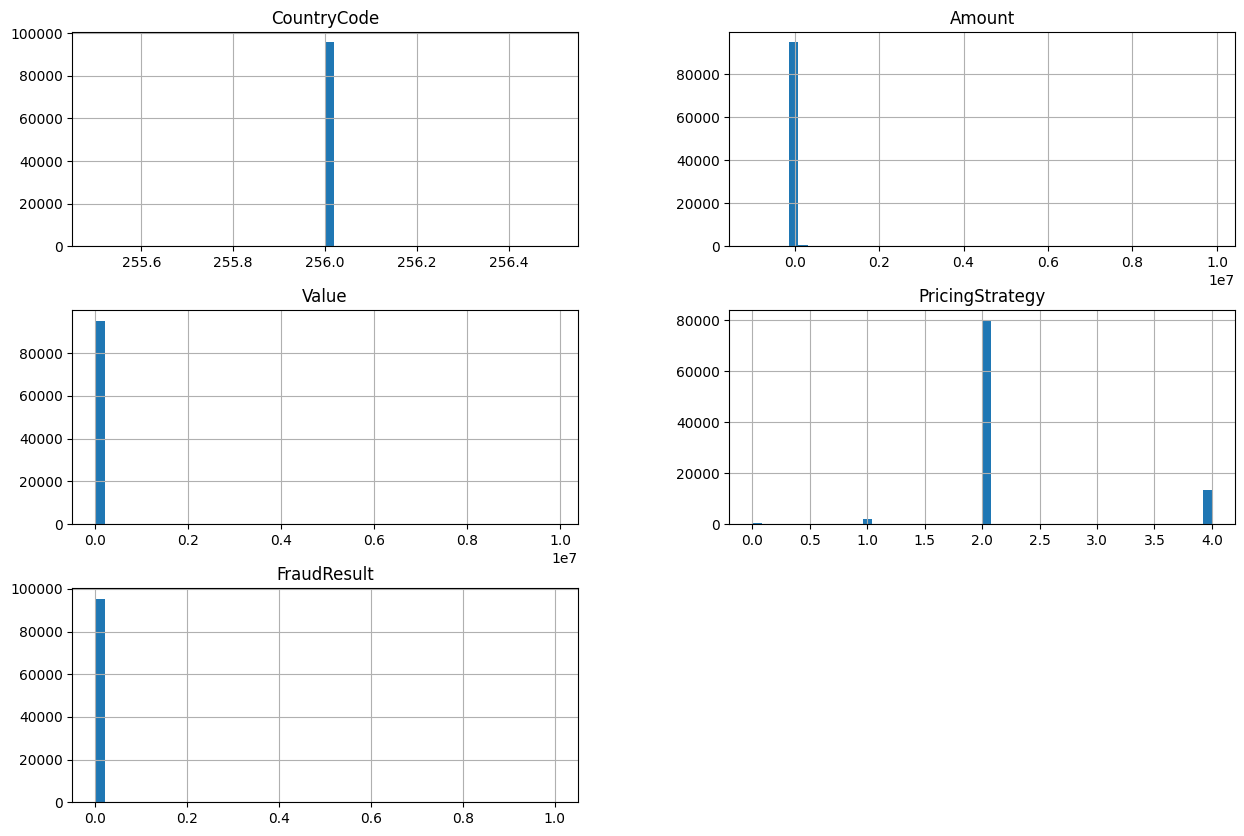

In [10]:
# distribution plots - Histograms
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize = (15, 10), bins = 50);

### Missing input

In [ ]:
# Jobs
## Let's fill missing values with the residual category
df['JOB'] = df['JOB'].fillna(value = 'Other')

In [ ]:
df.stb.freq(['JOB'], style = True)

,JOB,count,percent,cumulative_count,cumulative_percent
0,Other,"2,667",44.75%,"2,667",44.75%
1,ProfExe,"1,276",21.41%,"3,943",66.16%
2,Office,948,15.91%,"4,891",82.06%
3,Mgr,767,12.87%,"5,658",94.93%
4,Self,193,3.24%,"5,851",98.17%
5,Sales,109,1.83%,"5,960",100.00%


In [ ]:
# Reason
## We fill missing values with the most frequent value ('DebtCon')
df['REASON'] = df['REASON'].fillna('DebtCon')

In [ ]:
df.stb.freq(['REASON'], style = True)

,REASON,count,percent,cumulative_count,cumulative_percent
0,DebtCon,"4,180",70.13%,"4,180",70.13%
1,HomeImp,"1,780",29.87%,"5,960",100.00%


In [ ]:
# numeric variables
## we input missings with their median (given the outliers detected)
df['DEBTINC'] = df['DEBTINC'].fillna(df['DEBTINC'].median())
df['DEROG'] = df['DEROG'].fillna(df['DEROG'].median())
df['DELINQ'] = df['DELINQ'].fillna(df['DELINQ'].median())
df['MORTDUE'] = df['MORTDUE'].fillna(df['MORTDUE'].median())
df['YOJ'] = df['YOJ'].fillna(df['YOJ'].median())
df['NINQ'] = df['NINQ'].fillna(df['NINQ'].median())
df['CLAGE'] = df['CLAGE'].fillna(df['CLAGE'].median())
df['CLNO'] = df['CLNO'].fillna(df['CLNO'].median())
df['VALUE'] = df['VALUE'].fillna(df['VALUE'].median())

In [ ]:
# missing check
df.stb.missing()

,missing,total,percent
BAD,0,5960,0.0
LOAN,0,5960,0.0
MORTDUE,0,5960,0.0
VALUE,0,5960,0.0
REASON,0,5960,0.0
JOB,0,5960,0.0
YOJ,0,5960,0.0
DEROG,0,5960,0.0
DELINQ,0,5960,0.0
CLAGE,0,5960,0.0


## Bivariate Analysis


In [11]:
# Selecting only numeric variables
numeric_df = df.select_dtypes(include=['number'])

In [12]:
numeric_df.corr()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
CountryCode,NaN,NaN,NaN,NaN,NaN
Amount,NaN,1.000000,0.989692,-0.061931,0.557370
Value,NaN,0.989692,1.000000,-0.017020,0.566739
PricingStrategy,NaN,-0.061931,-0.017020,1.000000,-0.033821
FraudResult,NaN,0.557370,0.566739,-0.033821,1.000000


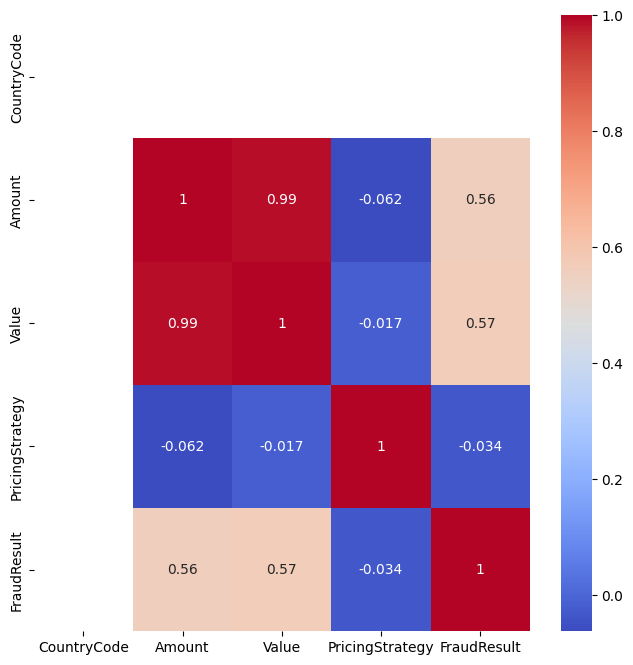

In [13]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(numeric_df.corr(),
            cmap = 'coolwarm',
            annot = True)

- **Information Value (IV)**:
  - IV measures the predictive power of a feature in relation to a binary target variable. It quantifies how well a feature separates the classes (e.g., default vs. non-default).
  - IV is calculated based on the distribution of the feature values across the target classes and is particularly useful for binary classification problems.

- **Correlation**:
  - Correlation measures the strength and direction of a linear relationship between two continuous variables. It quantifies how changes in one variable are associated with changes in another.
  - The most common measure is Pearson's correlation coefficient, which ranges from -1 to +1.

## WOE Transformation

### 1. With NANs

## Overview of ScorecardPy

**ScorecardPy** is a Python library designed for building credit scoring models. It provides tools and functions to help data scientists and analysts create, validate, and deploy scorecards, particularly in the context of binary classification problems, such as predicting loan defaults or credit risk.

### Key Features

1. **Binning**:
   - Automatically bins continuous variables into categories, which helps in transforming numerical data into a format suitable for scorecard modeling.

2. **WoE (Weight of Evidence) Transformation**:
   - Converts binned variables into Weight of Evidence, which is a common transformation used in credit scoring to quantify the predictive power of each category.

3. **Scorecard Development**:
   - Facilitates the creation of a scorecard by allowing users to define points for each feature based on their predictive power and importance.

4. **Model Evaluation**:
   - Provides tools for evaluating the performance of the scorecard through metrics such as KS statistics, AUC (Area Under the Curve), and confusion matrices.

5. **Visualization**:
   - Includes functions for visualizing the distribution of variables, the relationship between features and the target variable, and the overall performance of the scorecard.

6. **Integration**:
   - Can be easily integrated into existing data science workflows and can work with pandas DataFrames, making it user-friendly for those familiar with Python and data manipulation.

### Use Cases

- **Credit Risk Assessment**: Building models to evaluate the creditworthiness of applicants.
- **Fraud Detection**: Identifying potentially fraudulent transactions or behaviors.
- **Customer Segmentation**: Analyzing customer data to inform marketing strategies or product offerings.


In [14]:
!pip install scorecardpy
!pip install monotonic-binning
import scorecardpy as sc
from monotonic_binning.monotonic_woe_binning import Binning

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.7-py3-none-any.whl size=60663 sha256=e5648204d7c5f43e5bf9a60cf13f051dd20e451011255ae4a16802dce585e2f9
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\49\49\e9\7b845548eed3624ce37effdd13e9cb95a99272d692eb9e9e23
Successfully built scorecardpy


In [ ]:
# reload data
df = pd.read_csv('https://raw.githubusercontent.com/Carl-Lejerskar/HMEQ/master/hmeq.csv')

#### a) Train / Test split

In [15]:
# Perform a 70 / 30 split of data
train, test = sc.split_df(df, 'FraudResult', ratio = 0.7, seed = 999).values()

\#### b) Compute monotonic WOEs - Numeric Variables

In [16]:
var = train.drop(['FraudResult', 'TransactionId', 'AccountId', 'ProviderId'], axis = 1).columns
y_var = train['FraudResult']

def woe_num(x, y):
  bin_object = Binning(y, n_threshold = 50, y_threshold = 10, p_threshold = 0.35, sign=False)
  global breaks
  breaks = {}
  for i in x:
    bin_object.fit(train[[y, i]])
    breaks[i] = (bin_object.bins[1:-1].tolist())
  return breaks

### Binning Parameters Explanation

The `Binning` class is utilized to segment numeric variables into bins based on specific criteria:

- **`n_threshold=50`**: This parameter sets the minimum number of unique values required in a variable to consider it for binning.
- **`y_threshold=10`**: This specifies the minimum count of observations that must be present in each bin to ensure statistical significance.
- **`p_threshold=0.35`**: This threshold determines the acceptable proportion of good versus bad loans within the bins, aiding in the identification of meaningful segments.

These parameters help create robust bins for effective Weight of Evidence (WoE) calculations, enhancing predictive modeling.


In [17]:
woe_num(var, 'FraudResult')

AttributeError: `np.Inf` was removed in the NumPy 2.0 release. Use `np.inf` instead.

### Interpretation of Binning Results

The following bins have been established for the numeric variables in the dataset, indicating the cut points for each feature:

- **LOAN**: Bins at $38,600 and $89,200.
- **MORTDUE**: Bins at $153,896 and $399,412.
- **VALUE**: Single bin at $855,909.
- **YOJ (Years on Job)**: Bins at 0.0 and 41.0 years.
- **DEROG (Derogatory Marks)**: Bins at 0, 1, 2, and 10 marks.
- **DELINQ (Delinquencies)**: Bins at 0, 1, 2, 3, and 15 delinquencies.
- **CLAGE (Credit Age)**: Single bin at 1154.63 days.
- **NINQ (Number of Inquiries)**: Bins at 0, 1, 2, 3, 4, and 17 inquiries.
- **CLNO (Number of Credit Lines)**: Bins at 26, 32, 38, and 71 credit lines.
- **DEBTINC (Debt-to-Income Ratio)**: Bins at approximately 30.77, 34.53, 40.32, 42.91, 45.41, and 203.31.

These bins will be used to calculate the Weight of Evidence (WoE) for each variable, aiding in predictive modeling and risk assessment.


#### c) Categorical variables

In [ ]:
# Check categorical variables names
bins = sc.woebin(train, y = 'BAD', x = ['JOB', 'REASON'], save_breaks_list = 'cat_breaks')

[INFO] creating woe binning ...
[INFO] The breaks_list is saved as cat_breaks_20241003_105721.py


#### d) Merge numeric and categorical variables breaks

In [ ]:
# import dictionary
from cat_breaks_20241003_105721 import breaks_list
breaks_list

# merge
breaks.update(breaks_list)
print(breaks)

{'LOAN': [38600.0, 89200.0], 'MORTDUE': [153896.0, 399412.0], 'VALUE': [855909.0], 'YOJ': [0.0, 41.0], 'DEROG': [0.0, 1.0, 2.0, 10.0], 'DELINQ': [0.0, 1.0, 2.0, 3.0, 15.0], 'CLAGE': [1154.6333333], 'NINQ': [0.0, 1.0, 2.0, 3.0, 4.0, 17.0], 'CLNO': [26.0, 32.0, 38.0, 71.0], 'DEBTINC': [30.774536167, 34.529550086, 40.315819301, 42.909997351, 45.413177555, 203.31214869], 'JOB': ['Office', 'ProfExe', 'Mgr%,%Other', 'Self%,%Sales'], 'REASON': ['DebtCon', 'HomeImp']}


#### e) Compute WOEs

In [ ]:
bins_adj = sc.woebin(df, 'BAD', breaks_list= breaks, positive = 'bad|0') # change positive to adjust WOE to ln(GOOD / BAD)

[INFO] creating woe binning ...


{'YOJ': <Figure size 640x480 with 2 Axes>,
 'DEBTINC': <Figure size 640x480 with 2 Axes>,
 'CLAGE': <Figure size 640x480 with 2 Axes>,
 'DELINQ': <Figure size 640x480 with 2 Axes>,
 'REASON': <Figure size 640x480 with 2 Axes>,
 'JOB': <Figure size 640x480 with 2 Axes>,
 'DEROG': <Figure size 640x480 with 2 Axes>,
 'VALUE': <Figure size 640x480 with 2 Axes>,
 'CLNO': <Figure size 640x480 with 2 Axes>,
 'MORTDUE': <Figure size 640x480 with 2 Axes>,
 'LOAN': <Figure size 640x480 with 2 Axes>,
 'NINQ': <Figure size 640x480 with 2 Axes>}

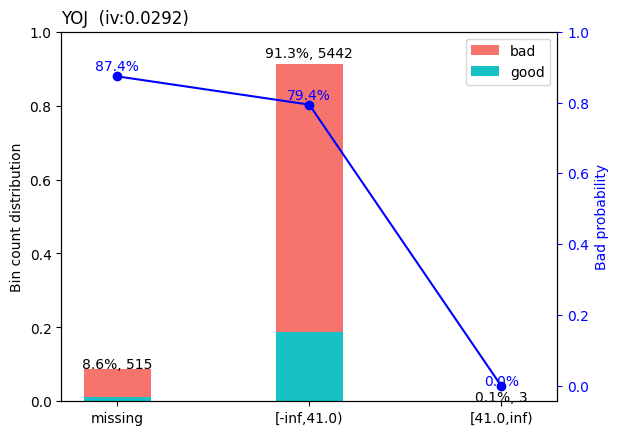

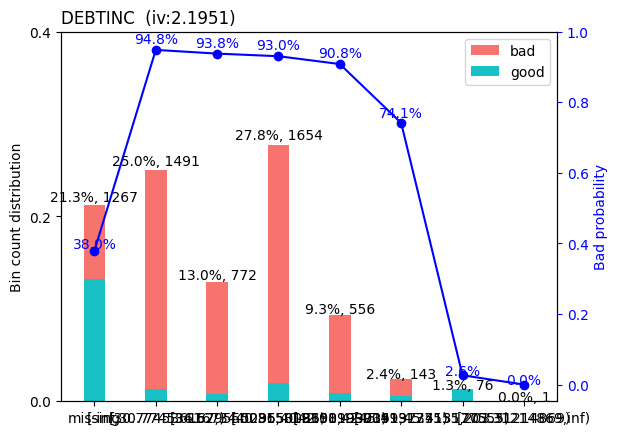

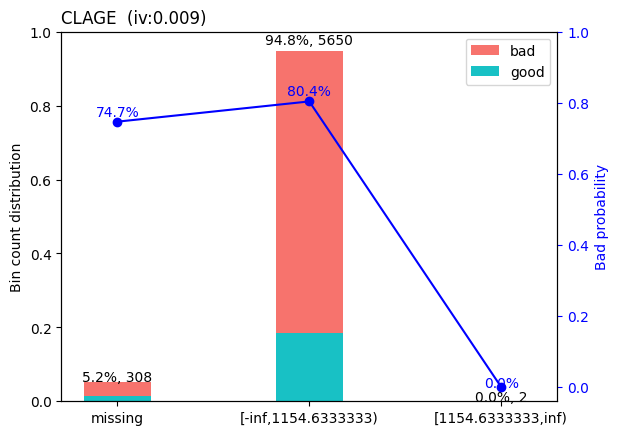

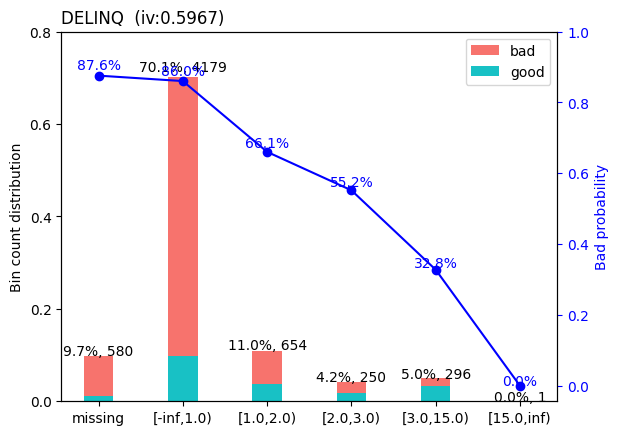

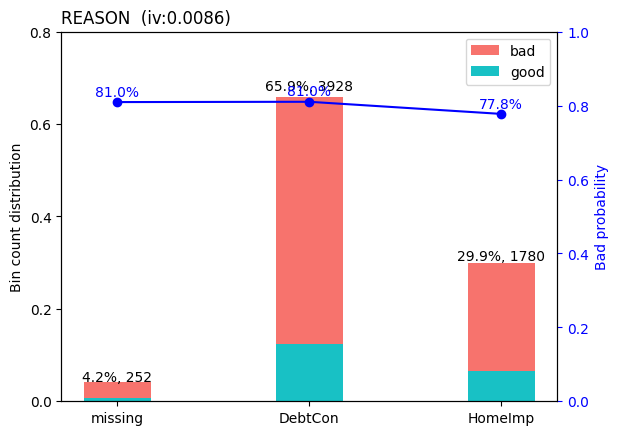

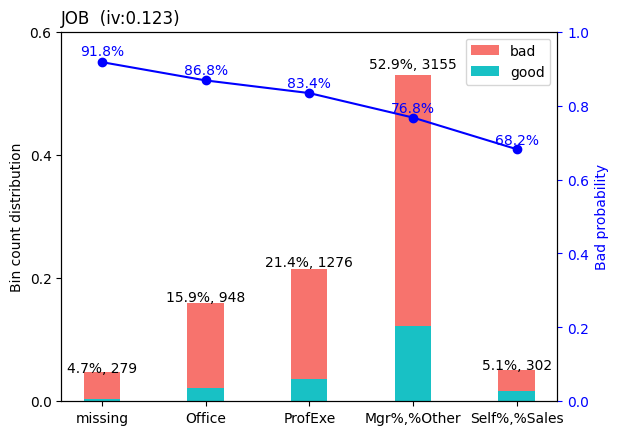

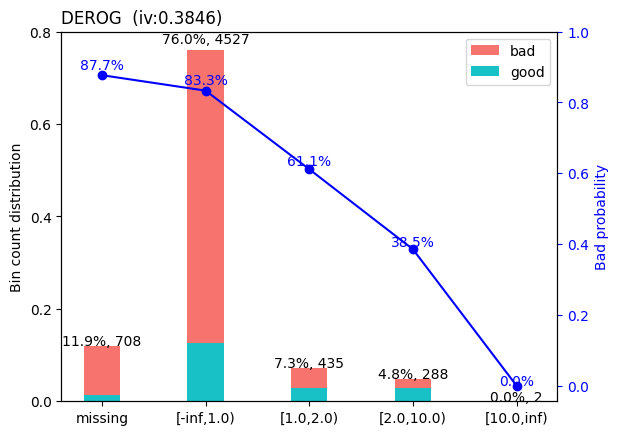

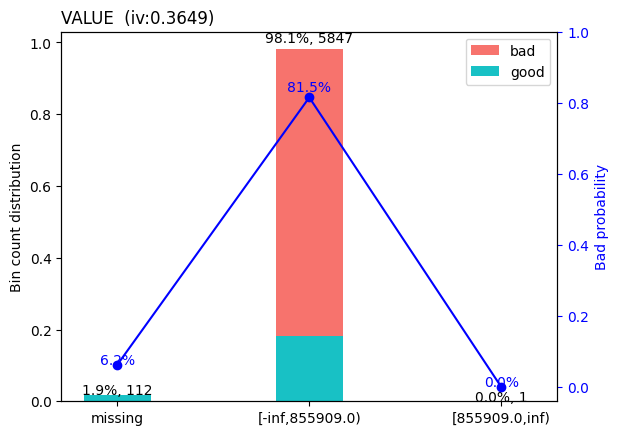

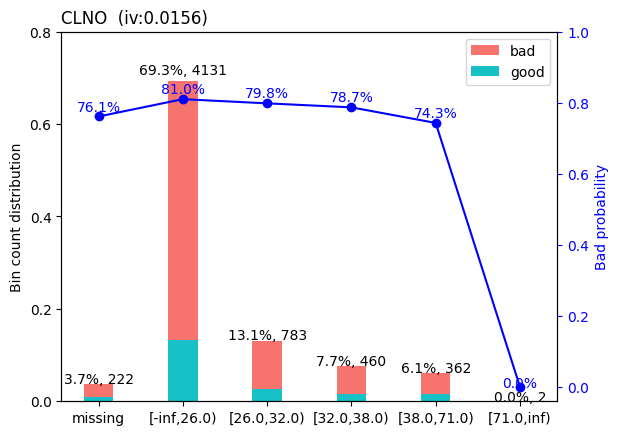

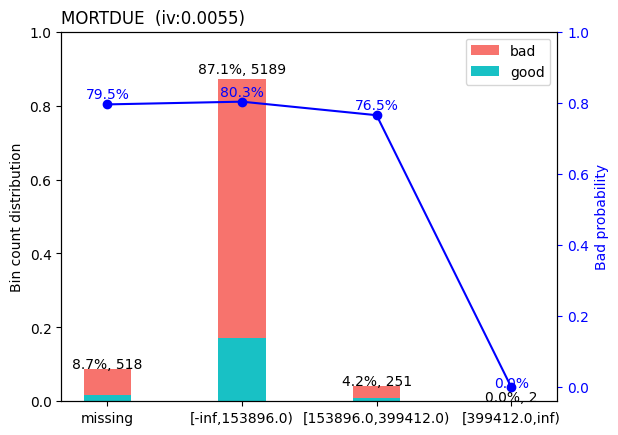

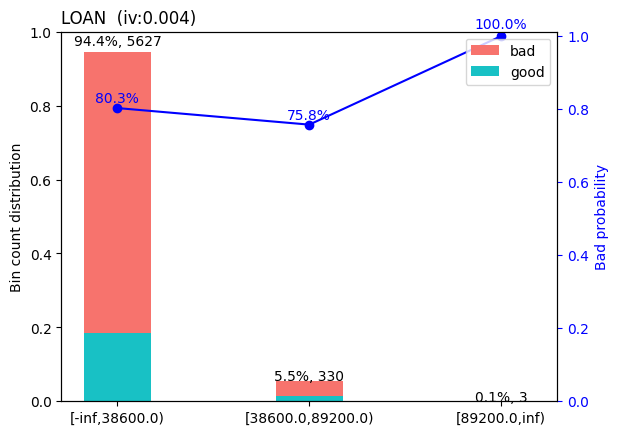

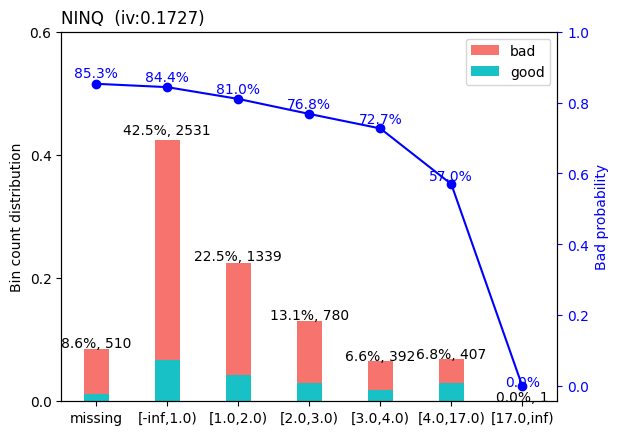

In [ ]:
sc.woebin_plot(bins_adj)

### Example: WoE Plot Explanation for JOB Variable

The plot visualizes the Weight of Evidence (WoE) for the **JOB** variable, highlighting the relationship between job types and loan performance.

1. **X-Axis**: Different job categories (e.g., "missing," "Office," "ProfExe," "Mgr", "Other" ,"Self","Sales").
   
2. **Y-Axis**:
   - **Left**: Distribution of bad (red) and good (green) loans.
   - **Right**: Probability of bad loans (blue line).

3. **Bars**:
   - **Red Bars**: Proportion of bad loans.
   - **Green Bars**: Proportion of good loans.
   - Percentages indicate bad loan distribution per category.

4. **Blue Line**: Represents the bad loan probability for each job type.

5. **Information Value (IV)**: **0.123**, indicating the predictive power of the JOB variable.

### Interpretation
- Higher red percentages indicate greater risk.
- Higher green percentages suggest lower risk.
- This plot aids in assessing which job types are more predictive of loan status, informing credit risk management strategies.


#### f) Apply transformations to df

In [ ]:
# converting train and test into woe values
train_woe = sc.woebin_ply(train, bins_adj)
test_woe = sc.woebin_ply(test, bins_adj)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


#### g) Merge original variables with WOEs

In this case, we will merge by index because we don't have any ID.

In [ ]:
# Merge by index
train_final = train.merge(train_woe, how = 'left', left_index=True, right_index=True)
test_final = test.merge(test_woe, how = 'left', left_index=True, right_index=True)

In [ ]:
train_final.head(10)

,BAD_x,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,BAD_y,YOJ_woe,DEBTINC_woe,CLAGE_woe,DELINQ_woe,REASON_woe,JOB_woe,DEROG_woe,VALUE_woe,CLNO_woe,MORTDUE_woe,LOAN_woe,NINQ_woe
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,1,-0.040366,-1.880721,0.020057,0.429758,-0.138124,-0.194240,0.220601,0.091721,0.060205,0.015803,0.015924,0.062369
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,1,-0.040366,-1.880721,0.020057,-1.180877,-0.138124,-0.194240,0.220601,0.091721,0.060205,0.015803,0.015924,0.295176
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.545228,-1.880721,-0.308261,0.564183,0.057476,1.020240,0.575791,-4.097682,-0.230025,-0.032048,0.015924,0.368226
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,1,-0.040366,1.204324,0.020057,0.429758,-0.138124,-0.194240,0.220601,0.091721,0.060205,0.015803,0.015924,0.062369
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,1,-0.040366,1.204324,0.020057,0.429758,-0.138124,-0.194240,0.220601,0.091721,0.060205,0.015803,0.015924,0.295176
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN,1,-0.040366,-1.880721,0.020057,-1.180877,-0.138124,-0.194240,0.220601,0.091721,0.060205,0.015803,0.015924,0.062369
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN,1,-0.040366,-1.880721,0.020057,0.429758,-0.138124,-0.625915,0.220601,0.091721,0.060205,-0.032048,0.015924,0.295176
10,1,2000,22608.0,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,1,-0.040366,-1.880721,-0.308261,0.564183,0.057476,1.020240,0.575791,-4.097682,-0.230025,0.015803,0.015924,0.368226
13,0,2000,64536.0,87400.0,NaN,Mgr,2.5,0.0,0.0,147.133333,0.0,24.0,NaN,0,-0.040366,-1.880721,0.020057,0.429758,0.057476,-0.194240,0.220601,0.091721,0.060205,0.015803,0.015924,0.295176
14,1,2100,71000.0,83850.0,HomeImp,Other,8.0,0.0,1.0,123.000000,0.0,16.0,NaN,1,-0.040366,-1.880721,0.020057,-0.723884,-0.138124,-0.194240,0.220601,0.091721,0.060205,0.015803,0.015924,0.295176


# Merging Datasets with Weight of Evidence (WoE)

In this section, we merge the original training and

*   testing datasets with their respective Weight of Evidence (WoE) transformed datasets to enhance the predictive power of our logistic regression model.
*   Merging the original dataset with the WoE transformed dataset provides valuable insights into the predictive relationships of features, improving the performance of our logistic regression model for tasks such as predicting loan defaults.





In [ ]:
train_final = train_final.drop(columns = 'BAD_y').rename(columns={'BAD_x':'vd'})
test_final = test_final.drop(columns = 'BAD_y').rename(columns={'BAD_x':'vd'})

### Missing Input

In [ ]:
# Jobs
## Let's fill missing values with the residual category
train_final['JOB'] = train_final['JOB'].fillna(value = 'Other')

# Reason
## We fill missing values with the most frequent value ('DebtCon')
train_final['REASON'] = train_final['REASON'].fillna('DebtCon')

# numeric variables
## we input missings with their median (given the outliers detected)
train_final['DEBTINC'] = train_final['DEBTINC'].fillna(train_final['DEBTINC'].median())
train_final['DEROG'] = train_final['DEROG'].fillna(train_final['DEROG'].median())
train_final['DELINQ'] = train_final['DELINQ'].fillna(train_final['DELINQ'].median())
train_final['MORTDUE'] = train_final['MORTDUE'].fillna(train_final['MORTDUE'].median())
train_final['YOJ'] = train_final['YOJ'].fillna(train_final['YOJ'].median())
train_final['NINQ'] = train_final['NINQ'].fillna(train_final['NINQ'].median())
train_final['CLAGE'] = train_final['CLAGE'].fillna(train_final['CLAGE'].median())
train_final['CLNO'] = train_final['CLNO'].fillna(train_final['CLNO'].median())
train_final['VALUE'] = train_final['VALUE'].fillna(train_final['VALUE'].median())

# missing check
train_final.stb.missing()

,missing,total,percent
vd,0,4172,0.0
YOJ_woe,0,4172,0.0
LOAN_woe,0,4172,0.0
MORTDUE_woe,0,4172,0.0
CLNO_woe,0,4172,0.0
VALUE_woe,0,4172,0.0
DEROG_woe,0,4172,0.0
JOB_woe,0,4172,0.0
REASON_woe,0,4172,0.0
DELINQ_woe,0,4172,0.0


In [ ]:
# Jobs
## Let's fill missing values with the residual category
test_final['JOB'] = test_final['JOB'].fillna(value = 'Other')

# Reason
## We fill missing values with the most frequent value ('DebtCon')
test_final['REASON'] = test_final['REASON'].fillna('DebtCon')

# numeric variables
## we input missings with their median (given the outliers detected)
test_final['DEBTINC'] = test_final['DEBTINC'].fillna(test_final['DEBTINC'].median())
test_final['DEROG'] = test_final['DEROG'].fillna(test_final['DEROG'].median())
test_final['DELINQ'] = test_final['DELINQ'].fillna(test_final['DELINQ'].median())
test_final['MORTDUE'] = test_final['MORTDUE'].fillna(test_final['MORTDUE'].median())
test_final['YOJ'] = test_final['YOJ'].fillna(test_final['YOJ'].median())
test_final['NINQ'] = test_final['NINQ'].fillna(test_final['NINQ'].median())
test_final['CLAGE'] = test_final['CLAGE'].fillna(test_final['CLAGE'].median())
test_final['CLNO'] = test_final['CLNO'].fillna(test_final['CLNO'].median())
test_final['VALUE'] = test_final['VALUE'].fillna(test_final['VALUE'].median())

# missing check
test_final.stb.missing()

,missing,total,percent
vd,0,1788,0.0
YOJ_woe,0,1788,0.0
LOAN_woe,0,1788,0.0
MORTDUE_woe,0,1788,0.0
CLNO_woe,0,1788,0.0
VALUE_woe,0,1788,0.0
DEROG_woe,0,1788,0.0
JOB_woe,0,1788,0.0
REASON_woe,0,1788,0.0
DELINQ_woe,0,1788,0.0


## Categorical variables

We can drop categorical variables that were transformed to WOEs or perform a One Hot Ecoding to them

In [ ]:
# Drop transformed variables
train_final = train_final.drop(columns = ['JOB', 'REASON'])
test_final = test_final.drop(columns = ['JOB', 'REASON'])

## IV Analysis

In [ ]:
# This function calculates information value (IV) for multiple x variables
sc.iv(train_final, y = 'vd')

,variable,info_value
2,DEBTINC_woe,2.187028
10,LOAN,0.823108
16,DELINQ,0.656117
9,DELINQ_woe,0.592269
6,DEROG,0.440636
18,DEROG_woe,0.434837
14,VALUE_woe,0.392219
0,YOJ,0.329940
20,CLNO,0.246640
11,NINQ,0.207704


## Information Value (IV) Analysis

The command `sc.iv(train_final, y = 'vd')` computes the Information Value (IV) for each variable in the `train_final` dataset with respect to the target variable `vd`. The IV measures the predictive power of a feature in relation to the binary outcome.


### Explanation of Results

1. **DEBTINC_woe (IV = 2.187028)**: This variable has the highest IV, indicating it is a strong predictor of the target variable (`vd`). An IV above 1.0 typically suggests that the feature has excellent predictive power.

2. **LOAN (IV = 0.823108)**: This variable also shows strong predictive capability, as values between 0.5 and 1.0 suggest good predictive strength.

3. **DELINQ (IV = 0.656117)** and **DELINQ_woe (IV = 0.592269)**: Both variables demonstrate moderate predictive power, with IV values indicating they are useful in distinguishing between the classes.

4. **DEROG (IV = 0.440636)** and **DEROG_woe (IV = 0.434837)**: These features have moderate IV values, suggesting they provide some predictive information but are less influential than the top variables.


In [ ]:
# This function filter variables base on specified conditions, such as information value,
# missing rate, identical value rate.
sc.var_filter(train_final, y = 'vd')

[INFO] filtering variables ...
Variable filtering on 4172 rows and 23 columns in 00:00:10 
6 variables are removed


,DELINQ_woe,NINQ,DEBTINC,MORTDUE,CLNO,JOB_woe,NINQ_woe,VALUE,LOAN,YOJ,YOJ_woe,DEROG,DEBTINC_woe,CLAGE,DEROG_woe,DELINQ,vd
0,0.429758,1.0,34.654955,25860.0,9.0,-0.19424,0.062369,39025.0,1100,10.5,-0.040366,0.0,-1.880721,94.366667,0.220601,0.0,1
1,-1.180877,0.0,34.654955,70053.0,14.0,-0.19424,0.295176,68400.0,1300,7.0,-0.040366,0.0,-1.880721,121.833333,0.220601,2.0,1
3,0.564183,1.0,34.654955,64978.0,20.0,1.02024,0.368226,89200.0,1500,7.0,0.545228,0.0,-1.880721,173.500000,0.575791,0.0,1
5,0.429758,1.0,37.113614,30548.0,8.0,-0.19424,0.062369,40320.0,1700,9.0,-0.040366,0.0,1.204324,101.466002,0.220601,0.0,1
7,0.429758,0.0,36.884894,28502.0,8.0,-0.19424,0.295176,43034.0,1800,11.0,-0.040366,0.0,1.204324,88.766030,0.220601,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5952,0.429758,0.0,34.751158,50240.0,16.0,-0.19424,0.295176,94687.0,88500,16.0,-0.040366,0.0,1.204324,214.426206,0.220601,0.0,0
5953,0.429758,0.0,34.242465,53307.0,15.0,-0.19424,0.295176,94058.0,88800,16.0,-0.040366,0.0,1.323958,218.304978,0.220601,0.0,0
5954,-0.723884,0.0,34.818262,48919.0,15.0,-0.19424,0.295176,93371.0,88900,15.0,-0.040366,0.0,1.204324,205.650159,0.220601,1.0,0
5955,0.429758,0.0,36.112347,57264.0,16.0,-0.19424,0.295176,90185.0,88900,16.0,-0.040366,0.0,1.204324,221.808718,0.220601,0.0,0


## Logistic Regression

##### 1) X / Y split

In [ ]:
y_train = train_final.loc[:,'vd']
X_train = train_final.loc[:,train_final.columns != 'vd']
y_test = test_final.loc[:,'vd']
X_test = test_final.loc[:,train_final.columns != 'vd']

#### 2) Fit model

In [ ]:
# # logistic regression ------
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression(penalty = 'l1', C= 0.9)
# lr.fit(X_train, y_train)
# print(lr.coef_)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Specify the solver as 'liblinear' to use L1 penalty
lr = LogisticRegression(penalty='l1', C=0.9, solver='liblinear')
lr.fit(X_train, y_train)

# Print the coefficients
print(lr.coef_)


[[-2.30906294e-05 -6.26950054e-06  3.68426749e-06 -1.52405886e-02
   1.36185923e-01  6.29832823e-01 -6.26949053e-03 -2.28093284e-02
  -4.42888154e-02  6.03883257e-03 -5.91833422e-01 -7.06670990e-01
  -1.18784815e+00 -8.96671990e-01 -2.66643172e+00 -3.16352151e+00
  -3.91774760e+00 -2.32266044e-01 -9.74426143e-01 -3.64676049e+00
  -1.28797861e+00 -7.07224480e-02]]


#### 3) Performance

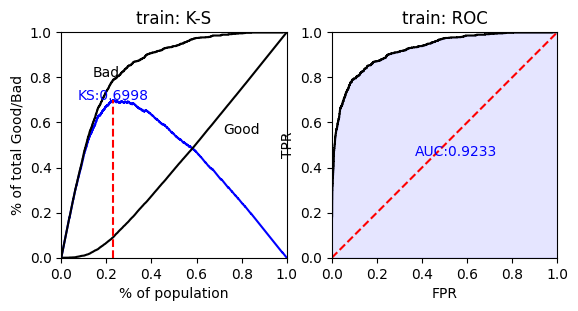

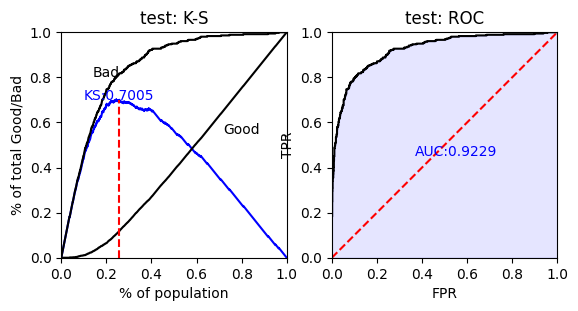

In [ ]:
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc ------
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

### Explanation of K-S and ROC Curves

The provided plots illustrate the performance metrics for a logistic regression model trained on the dataset. The left plot shows the Kolmogorov-Smirnov (K-S) statistic, while the right plot displays the Receiver Operating Characteristic (ROC) curve.

#### 1. K-S Plot (Left)
- **K-S Statistic**: The K-S value is **0.6998**, indicating a strong separation between the good and bad classes.
- **Axes**:
  - **X-Axis**: Percentage of the population.
  - **Y-Axis**: Cumulative percentage of total good/bad outcomes.
- **Curves**:
  - **Black Curve**: Represents the cumulative distribution of all instances.
  - **Blue Curve**: Represents the cumulative distribution of bad loans.
- The vertical dashed line highlights the point where the K-S statistic is calculated, showing the maximum distance between the two distributions.

#### 2. ROC Plot (Right)
- **AUC**: The Area Under the Curve (AUC) is **0.9233**, suggesting excellent model performance.
- **Axes**:
  - **X-Axis**: False Positive Rate (FPR).
  - **Y-Axis**: True Positive Rate (TPR).
- **Curves**:
  - The shaded area under the curve indicates the model's ability to distinguish between good and bad outcomes.
- The dashed diagonal line represents a random classifier, while the curve above it indicates the model's predictive power.

### Code Context
The plots are generated from the following code:

```python
# Predicted Probabilities
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# Performance Evaluation for K-S and ROC
train_perf = sc.perf_eva(y_train, train_pred, title="train")
test_perf = sc.perf_eva(y_test, test_pred, title="test")


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, roc_curve

predictions = lr.predict(X_test)

print('Accuracy')
print(accuracy_score(y_test, predictions))
print('AUC Score')
print(roc_auc_score(y_test, predictions))

Accuracy
0.8959731543624161
AUC Score
0.8067696680349288


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1431
           1       0.79      0.66      0.72       357

    accuracy                           0.90      1788
   macro avg       0.85      0.81      0.83      1788
weighted avg       0.89      0.90      0.89      1788



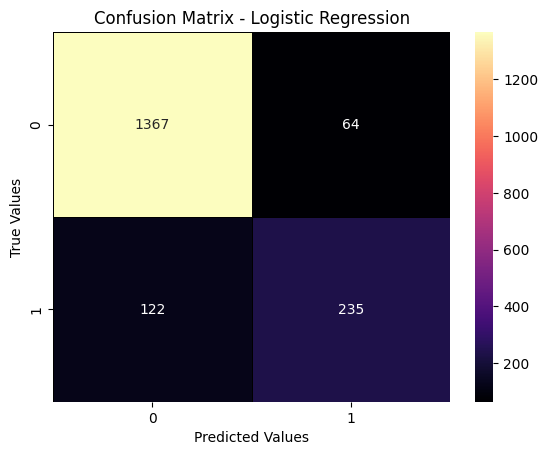

In [ ]:
conf_log2 = confusion_matrix(y_test,predictions)
sns.heatmap(data=conf_log2, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix - Logistic Regression');